### README
The purpose of this notebook is to walk the reader through some of the exploratory analysis that was done when working on this project. This is by no means all the work that was done, but showcases the things that we thought were important or significant. We have tried to explain our thought process in an organic and natural way

In [13]:
# Import required libraries
import pandas as pd # for holding data in a dataframe
import os # for manipulating directories and listing files
from matplotlib import pyplot as plt #visualization
import numpy as np # linear algebra and array work
from statsmodels.stats.proportion import proportions_ztest #significance testing

In [2]:
def read_csvs(dirPath):
    '''
    This function reads all the .csv files at the specified director 
    and then loads them individually into a merged dataframe. It 
    returns a merged dataframe with a reset index. It also appends the video number
    into the dataframe.
    '''
    # list files in directory
    files = os.listdir(dirPath)
    
    # Create list of valid .csv files in directory and sort numerically
    csvs = [csv for csv in files if csv.endswith('.csv')]
    csvs.sort(key = lambda x: int(x[1:-4]))
    
    # Parse through csv files
    for inx,csv in enumerate(csvs):
        # If this is the first file, we need to create the merged_df
        if inx == 0:
            merged_df = pd.read_csv(dirPath + csv)
            merged_df['video'] = 0 
        # else we just read and append
        else :
            temp_df = pd.read_csv(dirPath + csv)
            temp_df['video'] = inx
            merged_df = merged_df.append(temp_df)

    return merged_df.reset_index(drop=True)

In [3]:
# Load happy data
happyPath = 'dataset/happy_frames_openface/'
happy_df = read_csvs(happyPath)

# Load nervous data
nervousPath = 'dataset/nervous_frames_openface/'
nervous_df = read_csvs(nervousPath)

In [5]:
# Create list of AUs that we want to extract from the imported dataset
AUs = [' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r',
       ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r', ' AU15_r', ' AU17_r',
       ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r', 'video']
# Create a pointer to the original df that only includes the columns we want
happy_au_df = happy_df.loc[:,AUs]
nervous_au_df = nervous_df.loc[:, AUs]

In [6]:
# Get the max AU intenisty per AU per video
happy_max_au = happy_au_df.groupby('video').max()
nervous_max_au = nervous_au_df.groupby('video').max() 

In [7]:
# Count the number of times the max AU intensity was larger than 2.5
happy_au_arr = (happy_max_au > 2.5).sum()
nervous_au_arr = (nervous_max_au > 2.5).sum()

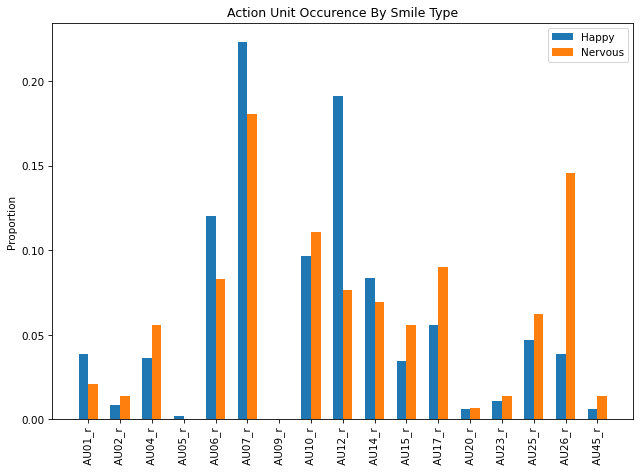

In [11]:
# Set our x axis 
x1 = happy_au_arr.index

# Get our y values, which are proportions
y1 = happy_au_arr.values / happy_au_arr.sum()
y2 = nervous_au_arr.values / nervous_au_arr.sum()

# Set axis arguments to control output
ind = np.arange(happy_au_arr.index.size)
width = 0.3

# Plot figure, bars, ticks and legend
plt.figure(num=1, figsize=(10,7),dpi=75)
p1 = plt.bar(ind,y1, width = width, label = 'Happy')
plt.xticks(rotation = 90)
p2 = plt.bar(ind+width,y2, width = width, label = 'Nervous')
plt.ylabel('Proportion')
plt.title('Action Unit Occurence By Smile Type')
plt.xticks(ind + width / 2, x1)
plt.legend(loc='best')
plt.savefig('action-unit-occurence-by-smile.png')

In [15]:
# performs 2 proportion z test between happy and nervous data for every AU
# Output is (Z-score,p-value) for a 2 tailed test.
for kk,_ in enumerate(nervous_au_arr.index):
    count = np.array([happy_au_arr[kk], nervous_au_arr[kk]])
    nobs = np.array([happy_au_arr.sum(), nervous_au_arr.sum()])
    print('for {}'.format(happy_au_arr.index[kk]),proportions_ztest(count,nobs))

for  AU01_r (1.0235940321165866, 0.30602706519804435)
for  AU02_r (-0.5638279704202742, 0.572871214265066)
for  AU04_r (-1.009143077489369, 0.3129060211649882)
for  AU05_r (0.5563454734615338, 0.5779747063736267)
for  AU06_r (1.2276797146323757, 0.21956722432193032)
for  AU07_r (1.0916023234904817, 0.27500793442653637)
for  AU09_r (nan, nan)
for  AU10_r (-0.5084982247269069, 0.6111039837774244)
for  AU12_r (3.2466237765125094, 0.0011678265425233078)
for  AU14_r (0.5497549326621741, 0.5824874735787529)
for  AU15_r (-1.1448438976048245, 0.25227382739316817)
for  AU17_r (-1.4784400203689474, 0.1392900401651598)
for  AU20_r (-0.06584204669242268, 0.9475035804251846)
for  AU23_r (-0.31111352959521155, 0.755714316069206)
for  AU25_r (-0.7301598446278202, 0.465292484503251)
for  AU26_r (-4.596325629444343, 4.300065088491656e-06)
for  AU45_r (-0.8667583376026822, 0.38607443392072516)
